# Artificial Neural Network from Scratch


Implementation based on: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-5/ and Andrew NG's Coursera Course weeks 4 and 5.


In [283]:
# Functions that comprise the neural net.
import numpy as np

def sigmoid(z):
    '''Vectorized sigmoid activation function.
    Takes a numpy array of input/weight products and computes
    the sigmoid activation over them. Formally:
    
                1
    g(z) = -----------
            1 + e^-z
    
    '''
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    '''Computes the derivative of g(z), 
    g'(z) = g(z) .* (1-g(z))
    '''
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))

def forward_prop(X, Theta):
    '''Forward propogation for a single X sample over a variable number of hidden layers.
    Takes a single X sample and a list of theta matrices, one for each layer.
    Assumes all nodes are connected and a single bias node in each layer.
    '''
    
    L = len(Theta) + 1      # Number of layers including h(x).
    Z = [None] * L          # Each Z[n] is the product (Theta[n] * A[n-1])
    A = [None] * L          # Each A[n] is bias + sigmoid(Z[n])
    bias = np.array([[1]])  # Bias will be prepended to each A[n].
    
    # Formality: Z[0] and A[0] are the input matrix.
    Z[0] = X
    A[0] = np.concatenate((bias, Z[0]))
    
    # Compute each of the layers.
    for i in range(1,L):
        Z[i] = np.dot(Theta[i-1], A[i-1])
        A[i] = np.concatenate((bias, sigmoid(Z[i])))
    
    # Hypothesis is just the last activation without its bias.
    h = A[-1][1:,:]
    
    return A, Z, h

def forward_prop_multi(X, Theta):
    '''Wrapper to evaluate forward_prop over multiple X samples
    '''
    A_multi = []
    Z_multi = []
    h_multi = []
    for x in X:
        A, Z, h = forward_prop(x, Theta)
        A_multi.append(A)
        Z_multi.append(Z)
        h_multi.append(h)
    return np.array(A_multi), np.array(Z_multi), np.array(h_multi)

def reshape_weights(weights, layer_dims):
    '''Creates Theta, a list of theta matrices that
    should be applied for forward_prop.
    Assumes len(layer_dims) = len(weights) + 1.
    '''
    # Reshape weights into Theta matrices.
    # A layer with n nodes and 1 bias mapping to a layer with
    # m nodes and 1 bias creates an (m by n + 1) matrix.
    Theta = []
    for i in range(len(weights)):
        n = layer_dims[i]
        m = layer_dims[i+1]
        reshaped = np.reshape(weights[i], (m, n + 1))
        Theta.append(reshaped)
    return np.array(Theta)

def compute_cost(X, y, Theta, learn_rate = 0.001):
    '''Uses forward prop to evaluate the cost (J) of the given
    Theta for all examples in X.  Evaluates forward_prop(X,Theta) 
    and computes the cost of the result relative y.
    A vectorized implementation would probably be faster,
    but arguably less readable.
    '''
    
    L = Theta.shape[0] # Number of layers.
    n = X.shape[0]     # Number of samples (e.g. 5000 images, n = 5000)
    m = X.shape[1]     # Number of features (e.g. m = 400 pixels in a 20x20 image).
    K = y.shape[1]     # Number of classes (e.g. 10 digits = 10)
        
    # Evaluate forward prop for all samples x in X.
    _, _, h = forward_prop_multi(X, Theta)
    
    # Compute error summation.
    print(y.shape)
    print(h.shape)
    errsum = 0
    for i in range(m):
        for k in range(K):
            print('i = %d, k = %d' % (i,k))
            print('y[%d][%d] = %lf' % (i, k, y[i][k]))
            print('h[%d][%d] = %lf' % (i, k, y[i][k]))
            errsum += y[i][k] * np.log(h[i][k]) + (1 - y[i][k]) * np.log(1 - (h[i][k]))
    
    # Compute regularization summation.
    # Sum of all thetas except the bias node thetas.
    # This means you leave out the 0th column.
    regsum = 0
    for t in Theta:
        regsum += np.sum(t[:,1:])
    
    J = (-1 / m) * errsum + ((learn_rate / (2 * m)) * regsum)
    
    return J


def back_prop(X, y, Theta, learn_rate = 0.001):
    '''Back-propogation algorithm computes the parameter updates that will
    reduce error on the training set. Implemented for a single (X,y) pair.
    Returns the cost for this (X,y,Theta) combination and a gradient matrix
    that indicates by how much to change the Theta for the next evaluation.
    '''
    
    L = Theta.shape[0]
    m = X.shape[1]
    
    # Evaluate forward prop for all samples in X.
    A, Z, h = forward_prop(X, Theta)
    
    # Compute the hypothesis cost.
    J = compute_cost(np.array([X]), np.array([y]), Theta, learn_rate)
    
    # Reverse iterate to compute delta and gradients.
    grad = []           # Gradient at each layer.
    Delta = [None] * L  # Delta at each layer.
    
    print(sigmoid(Z[-1]))
    
    # Last delta is just the difference of 
    Delta[-1] = h - y
    Delta[1] = np.multiply(Theta[-1], Delta[-1]) * sigmoid_derivative(Z[-1])
    
    print(Delta)
    
    return J, grad


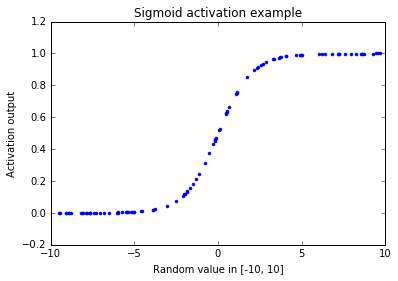

Forward prop hypothesis =  [[ 0.87824242]]
(3, 1)
(3, 1, 1)
i = 0, k = 0
y[0][0] = 1.000000
h[0][0] = 1.000000
i = 1, k = 0
y[1][0] = 0.000000
h[1][0] = 0.000000
i = 2, k = 0
y[2][0] = 1.000000
h[2][0] = 1.000000
Computed cost = 0.791240
(1, 1, 1)
(1, 1, 1)
i = 0, k = 0
y[0][0] = 1.000000
h[0][0] = 1.000000
i = 1, k = 0


IndexError: index 1 is out of bounds for axis 0 with size 1

In [284]:
# Function examples
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sigmoid activation function example
z = np.random.rand(100,1) * 100 % 20 -10
g = sigmoid(z)
plt.title('Sigmoid activation example')
plt.xlabel('Random value in [%d, %d]' % (floor(min(z)), ceil(max(z))))
plt.ylabel('Activation output')
plt.plot(z, g, 'b.')
plt.xlim(-10,10)
plt.ylim(-0.2,1.2)
plt.show()

# Forward propogation and reshape function example.
# Follows the example from coursera machine learning week 3.
# 3 inputs, one hidden-layer with 3 nodes, one output node.
X = np.matrix([[0.3], [0.4], [0.5]]) # 3 X inputs as a column vector.
layer_dims = [
    3, # Layer 0 has 3 nodes.
    3, # Layer 1 has 3 nodes.
    1, # Layer 2 has 1 node.
    1, # Hypothesis is 1 node.
]
weights = np.array([
    np.ones(12), # (3 nodes, 1 bias) -> (3 nodes)
    np.ones(4),  # (3 nodes, 1 bias) -> (1 node)
    np.ones(2),  # (1 node, 1 bias) -> (1 node)
])
Theta = reshape_weights(weights, layer_dims)
A, Z, h = forward_prop(X, Theta)
print('Forward prop hypothesis = ', h)

# Cost function example.
# Same as above, assume that the correct hypothesis is 1 
# (e.g. True in binary classification).
X_multi = np.array([
    X + 0.1,
    X + 0.2,
    X + 0.3
])
y_multi = np.array([
    np.array([1]),
    np.array([0]),
    np.array([1])
])
cost = compute_cost(X_multi, y_multi, Theta)
print('Computed cost = %lf' % cost)

# Back propogation function example.
# Should work for a single X, y pair with Theta for all layers.
X = np.matrix([[0.3], [0.4], [0.5]])
y = np.array([np.array([1])])
cost, gradient = back_prop(X, y, Theta)
print('Computed gradient = ', gradient)


In [124]:
# Reading data and using the neural net.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

# Read data into X and y vectors.
data = loadmat('data/ex3data1.mat')
X = data['X']
y = data['y']

# Understand the data dimensions.
print('Inputs (X): %d images, %d pixels (unfolded)' % (X.shape[0], X.shape[1]))
print('Labels (y): %d labels, %d unique' % (y.shape[0], len(np.unique(y))))

# Onehot-encoding turns y into a matrix where
# each row has a 1 in the position corresponding
# to the label, 0s everywhere else.
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)
print('Labels onehot-encoded %d x %d' % y_onehot.shape)


Inputs (X): 5000 images, 400 pixels (unfolded)
Labels (y): 5000 labels, 10 unique
Labels onehot-encoded 5000 x 10


In [109]:
# Scratch area
import numpy as np

a = np.ones(10)
b = np.reshape(a, (5,2))
print(a)
print(b)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
